[['Вильнюс', 'Брест', 531], ['Витебск', 'Брест', 638], ['Витебск', 'Вильюс', 360], ['Воронеж', 'Витебск', 869], ['Воронеж', 'Волгоград', 581], ['Волгоград', 'Витебск', 1455], ['Витебск', 'Ниж.Новгород', 911], ['Вильнюс', 'Даугавпилс', 211], ['Калининград', 'Брест', 699], ['Калиниград', 'Вильнюс', 333], ['Каунас', 'Вильнюс', 102], ['Киев', 'Вильнюс', 734], ['Киев', 'Житомир', 131], ['Житомир', 'Донецк', 863], ['Житомир', 'Волгоград', 1493], ['Кишинев', 'Киев', 467], ['Кишинев', 'Донецк', 812], ['С.Петербург', 'Витебск', 602], ['С.Петербург', 'Калининград', 739], ['С.Петербург', 'Рига', 641], ['Москва', 'Казань', 815], ['Москва', 'Ниж.Новгород', 411], ['Москва', 'Минск', 690], ['Москва', 'Донецк', 1084], ['Москва', 'С.Петербург', 664], ['Мурманск', 'С.Петербург', 1412], ['Мурманск', 'Минск', 2238], ['Орел', 'Витебск', 522], ['Орел', 'Донецк', 709], ['Орел', 'Москва', 368], ['Одесса', 'Киев', 487], ['Рига', 'Каунас', 267], ['Таллинн', 'Рига', 308], ['Харьков', 'Киев', 471], ['Харьков', 'С

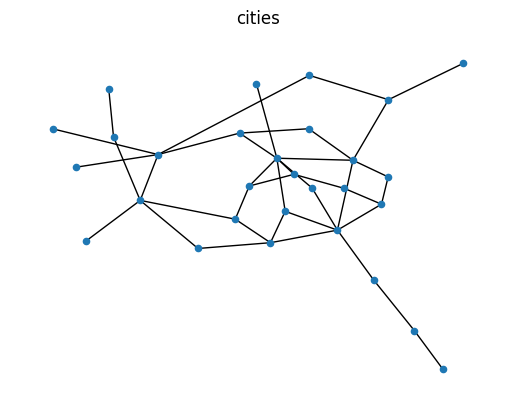

In [1]:
import os

import matplotlib.pyplot as plt
import networkx as nx

os.environ["SOURCE_NODE"] = "Брест"
os.environ["DESTINATION_NODE"] = "Казань"

SOURCE_NODE = os.getenv("SOURCE_NODE")  # Брест
DESTINATION_NODE = os.getenv("DESTINATION_NODE")  # Казань

graph_edges = list()
with open("data.csv", "r") as dataset:
    for line in dataset.readlines():
        e = line.split(";")
        graph_edges.append([
            e[0],
            e[1],
            int(e[2].replace("\n", ""))
        ])
print(graph_edges)

G = nx.Graph()
for e in graph_edges:
    G.add_edge(e[0], e[1], weight=e[2])

main_pos = nx.spring_layout(G, seed=23)
from draw_graph import draw_graph as dg

dg(G, main_pos, title_string="cities")

In [2]:
bfs_edges = []
for e in nx.bfs_edges(G, source=SOURCE_NODE):
    bfs_edges.append(e)
    if e.__contains__(DESTINATION_NODE):
        break
print("all bfs edges:")
for e in nx.bfs_edges(G, source=SOURCE_NODE):
    print(e)
print("bfs edges till DESTINATION_NODE:")
for e in bfs_edges:
    print(e)

all bfs edges:
('Брест', 'Вильнюс')
('Брест', 'Витебск')
('Брест', 'Калининград')
('Вильнюс', 'Даугавпилс')
('Вильнюс', 'Калиниград')
('Вильнюс', 'Каунас')
('Вильнюс', 'Киев')
('Витебск', 'Вильюс')
('Витебск', 'Воронеж')
('Витебск', 'Волгоград')
('Витебск', 'Ниж.Новгород')
('Витебск', 'С.Петербург')
('Витебск', 'Орел')
('Каунас', 'Рига')
('Киев', 'Житомир')
('Киев', 'Кишинев')
('Киев', 'Одесса')
('Киев', 'Харьков')
('Воронеж', 'Ярославль')
('Ниж.Новгород', 'Москва')
('С.Петербург', 'Мурманск')
('Орел', 'Донецк')
('Рига', 'Таллинн')
('Харьков', 'Симферополь')
('Ярославль', 'Минск')
('Москва', 'Казань')
('Казань', 'Уфа')
('Уфа', 'Самара')
bfs edges till DESTINATION_NODE:
('Брест', 'Вильнюс')
('Брест', 'Витебск')
('Брест', 'Калининград')
('Вильнюс', 'Даугавпилс')
('Вильнюс', 'Калиниград')
('Вильнюс', 'Каунас')
('Вильнюс', 'Киев')
('Витебск', 'Вильюс')
('Витебск', 'Воронеж')
('Витебск', 'Волгоград')
('Витебск', 'Ниж.Новгород')
('Витебск', 'С.Петербург')
('Витебск', 'Орел')
('Каунас', 'Рига

path:
[('Брест', 'Витебск'), ('Витебск', 'Ниж.Новгород'), ('Ниж.Новгород', 'Москва'), ('Москва', 'Казань')]


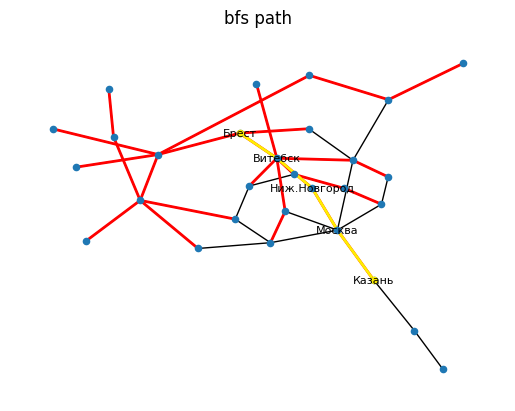

In [3]:
from find_path_and_draw import find_path_and_draw as fpd
fpd(G, bfs_edges, main_pos, title_string="bfs path")

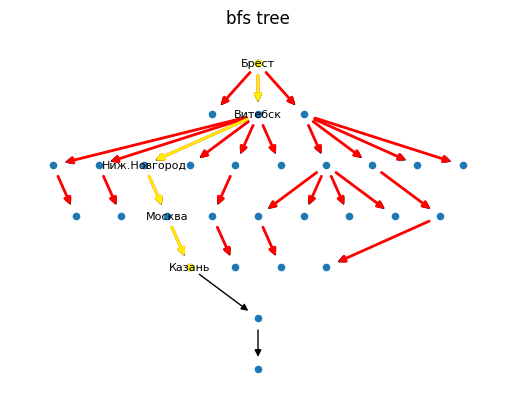

[('Брест', 'Вильнюс'), ('Брест', 'Витебск'), ('Брест', 'Калининград'), ('Вильнюс', 'Даугавпилс'), ('Вильнюс', 'Калиниград'), ('Вильнюс', 'Каунас'), ('Вильнюс', 'Киев'), ('Витебск', 'Вильюс'), ('Витебск', 'Воронеж'), ('Витебск', 'Волгоград'), ('Витебск', 'Ниж.Новгород'), ('Витебск', 'С.Петербург'), ('Витебск', 'Орел'), ('Каунас', 'Рига'), ('Киев', 'Житомир'), ('Киев', 'Кишинев'), ('Киев', 'Одесса'), ('Киев', 'Харьков'), ('Воронеж', 'Ярославль'), ('Ниж.Новгород', 'Москва'), ('С.Петербург', 'Мурманск'), ('Орел', 'Донецк'), ('Рига', 'Таллинн'), ('Харьков', 'Симферополь'), ('Ярославль', 'Минск'), ('Москва', 'Казань'), ('Казань', 'Уфа'), ('Уфа', 'Самара')]
complexity: 
46656


In [4]:
from generate_tree_position import generate_tree_position as gtp
bfs_tree_ = nx.bfs_tree(G, source=SOURCE_NODE)
pos_bfs_tree = gtp(bfs_tree_)
fpd(bfs_tree_, bfs_edges, pos_bfs_tree, title_string="bfs tree", print_nodes=False)
# compute complexity as b^(d+1) b - branching factor; d - minimum result depth
print(bfs_tree_.edges)
from maximum_branching_factor import maximum_branching_factor as mbf
b = mbf(bfs_tree_)
d = len(nx.shortest_path(bfs_tree_, os.getenv("SOURCE_NODE"), os.getenv("DESTINATION_NODE")))
print("complexity: ")
print(b**(d+1))

In [5]:
dfs_edges = list()
for e in nx.dfs_edges(G, source=SOURCE_NODE):
    dfs_edges.append(e)
    if e.__contains__(DESTINATION_NODE):
        break
print("all dfs edges:")
for e in nx.dfs_edges(G, source=SOURCE_NODE):
    print(e)
print("dfs edges till DESTINATION_NODE:")
for e in dfs_edges:
    print(e)

all dfs edges:
('Брест', 'Вильнюс')
('Вильнюс', 'Даугавпилс')
('Вильнюс', 'Калиниград')
('Вильнюс', 'Каунас')
('Каунас', 'Рига')
('Рига', 'С.Петербург')
('С.Петербург', 'Витебск')
('Витебск', 'Вильюс')
('Витебск', 'Воронеж')
('Воронеж', 'Волгоград')
('Волгоград', 'Житомир')
('Житомир', 'Киев')
('Киев', 'Кишинев')
('Кишинев', 'Донецк')
('Донецк', 'Москва')
('Москва', 'Казань')
('Казань', 'Уфа')
('Уфа', 'Самара')
('Москва', 'Ниж.Новгород')
('Москва', 'Минск')
('Минск', 'Мурманск')
('Минск', 'Ярославль')
('Москва', 'Орел')
('Киев', 'Одесса')
('Киев', 'Харьков')
('Харьков', 'Симферополь')
('С.Петербург', 'Калининград')
('Рига', 'Таллинн')
dfs edges till DESTINATION_NODE:
('Брест', 'Вильнюс')
('Вильнюс', 'Даугавпилс')
('Вильнюс', 'Калиниград')
('Вильнюс', 'Каунас')
('Каунас', 'Рига')
('Рига', 'С.Петербург')
('С.Петербург', 'Витебск')
('Витебск', 'Вильюс')
('Витебск', 'Воронеж')
('Воронеж', 'Волгоград')
('Волгоград', 'Житомир')
('Житомир', 'Киев')
('Киев', 'Кишинев')
('Кишинев', 'Донецк')
('

path:
[('Брест', 'Вильнюс'), ('Вильнюс', 'Каунас'), ('Каунас', 'Рига'), ('Рига', 'С.Петербург'), ('С.Петербург', 'Витебск'), ('Витебск', 'Воронеж'), ('Воронеж', 'Волгоград'), ('Волгоград', 'Житомир'), ('Житомир', 'Киев'), ('Киев', 'Кишинев'), ('Кишинев', 'Донецк'), ('Донецк', 'Москва'), ('Москва', 'Казань')]


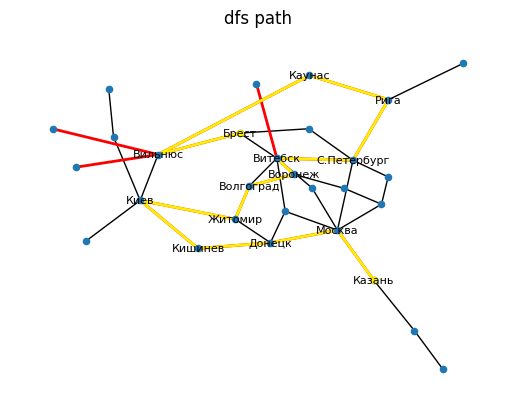

In [6]:
from find_path_and_draw import find_path_and_draw as fpd
fpd(G, dfs_edges, main_pos, title_string="dfs path")

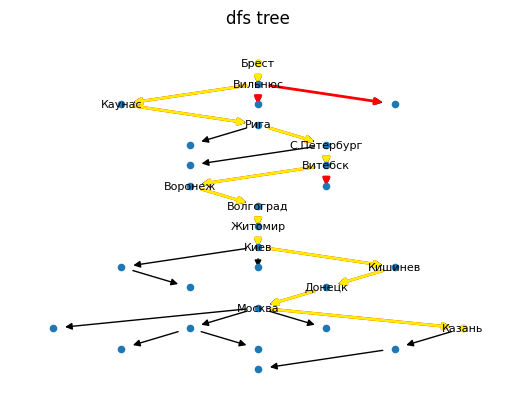

complexity:
288230376151711744


In [7]:
from find_path_and_draw import find_path_and_draw as fpd
from generate_tree_position import generate_tree_position as gtp
dfs_tree_ = nx.dfs_tree(G, source=SOURCE_NODE)
pos_dfs_tree = gtp(dfs_tree_)
fpd(dfs_tree_, dfs_edges, pos_dfs_tree, title_string="dfs tree", print_nodes=False)
# compute complexity as b^m where b - branching factor; m - maximum tree depth

b = mbf(dfs_tree_)
m = len(nx.shortest_path_length(dfs_tree_, SOURCE_NODE))
print("complexity:")
print(b**m)

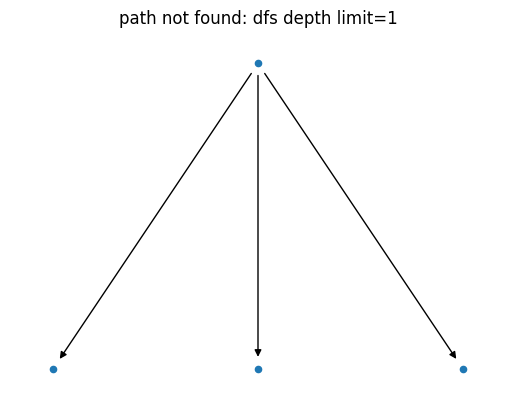

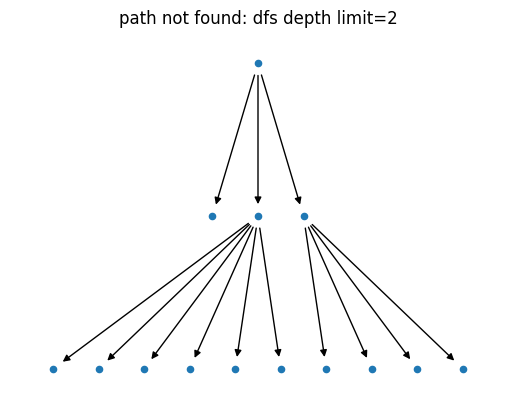

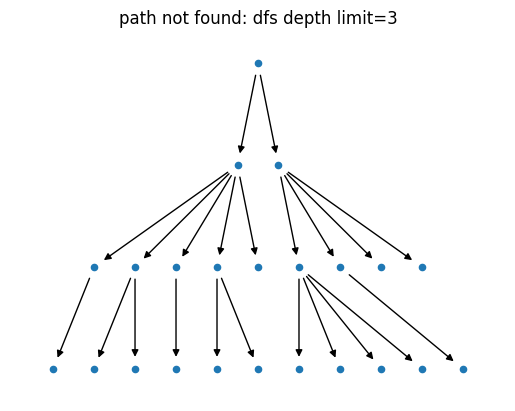

path:
[('Брест', 'Витебск'), ('Витебск', 'Ниж.Новгород'), ('Ниж.Новгород', 'Москва'), ('Москва', 'Казань')]
path:
[('Брест', 'Витебск'), ('Витебск', 'Ниж.Новгород'), ('Ниж.Новгород', 'Москва'), ('Москва', 'Казань')]
complexity:
256
path:
[('Брест', 'Вильнюс'), ('Вильнюс', 'Каунас'), ('Каунас', 'Рига'), ('Рига', 'С.Петербург'), ('С.Петербург', 'Москва'), ('Москва', 'Казань')]
path:
[('Брест', 'Вильнюс'), ('Вильнюс', 'Каунас'), ('Каунас', 'Рига'), ('Рига', 'С.Петербург'), ('С.Петербург', 'Москва'), ('Москва', 'Казань')]
complexity:
15625
path:
[('Брест', 'Вильнюс'), ('Вильнюс', 'Каунас'), ('Каунас', 'Рига'), ('Рига', 'С.Петербург'), ('С.Петербург', 'Витебск'), ('Витебск', 'Ниж.Новгород'), ('Ниж.Новгород', 'Москва'), ('Москва', 'Казань')]
path:
[('Брест', 'Вильнюс'), ('Вильнюс', 'Каунас'), ('Каунас', 'Рига'), ('Рига', 'С.Петербург'), ('С.Петербург', 'Витебск'), ('Витебск', 'Ниж.Новгород'), ('Ниж.Новгород', 'Москва'), ('Москва', 'Казань')]
complexity:
65536
path:
[('Брест', 'Вильнюс'), ('В

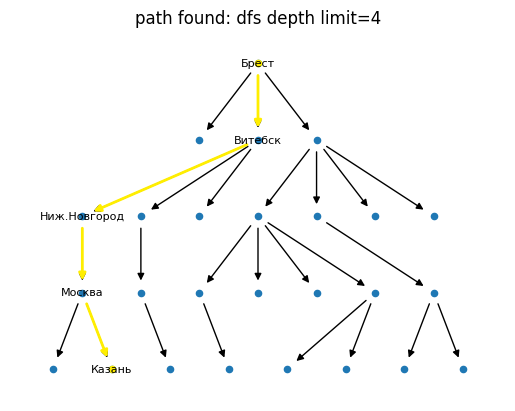

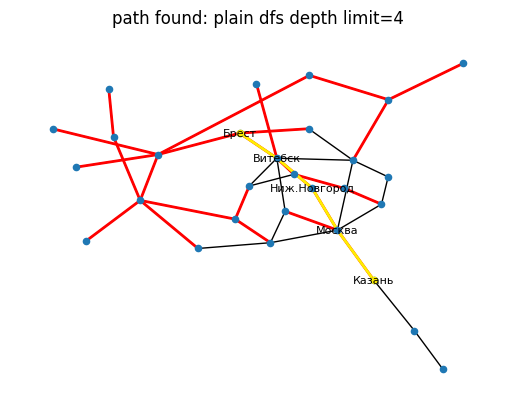

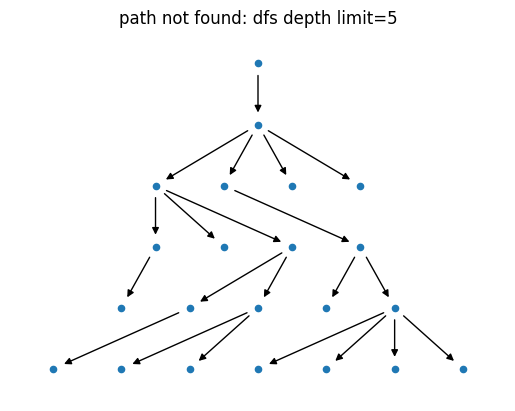

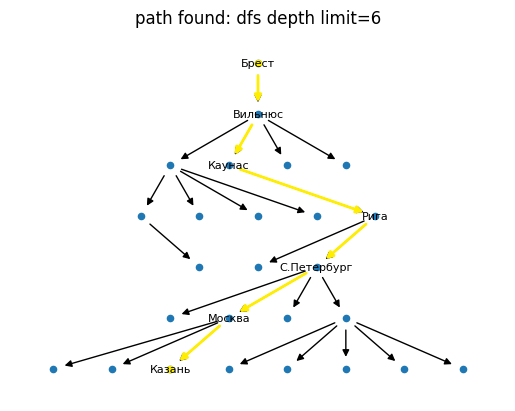

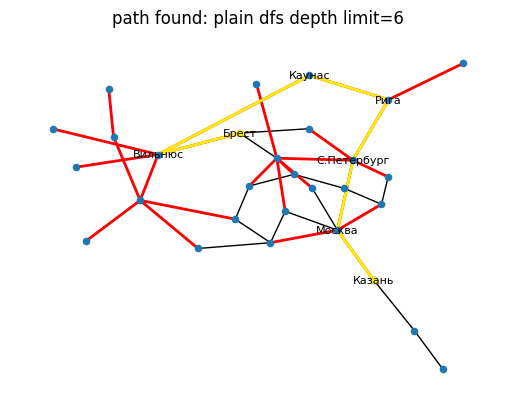

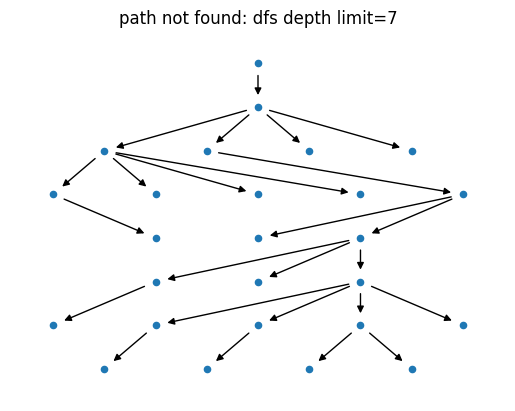

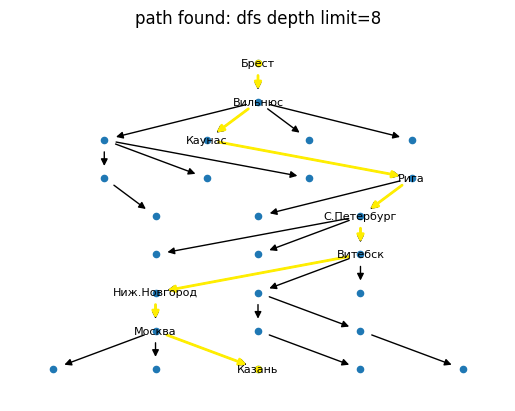

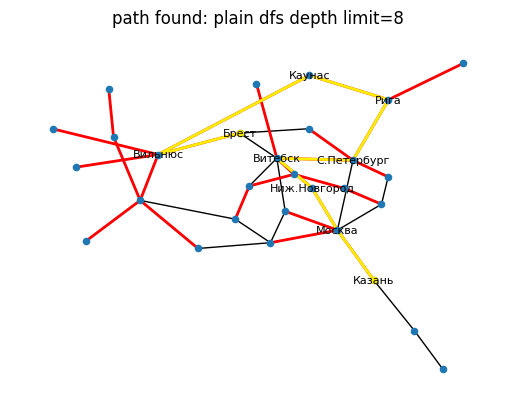

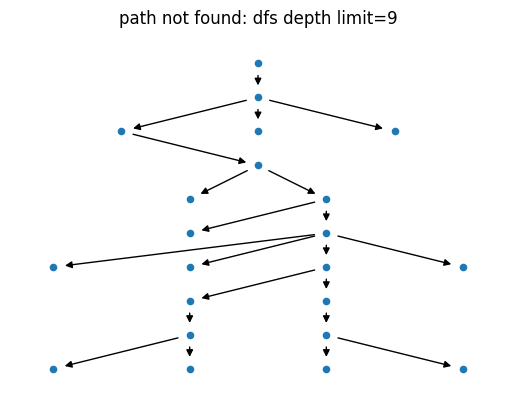

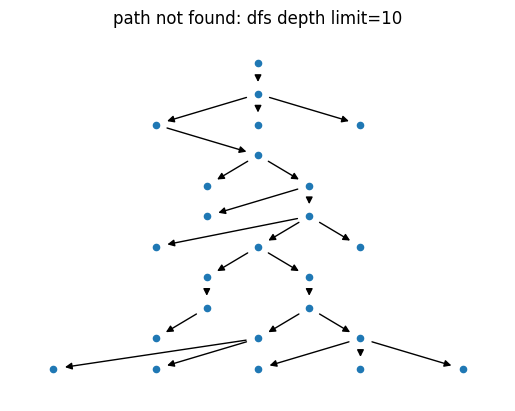

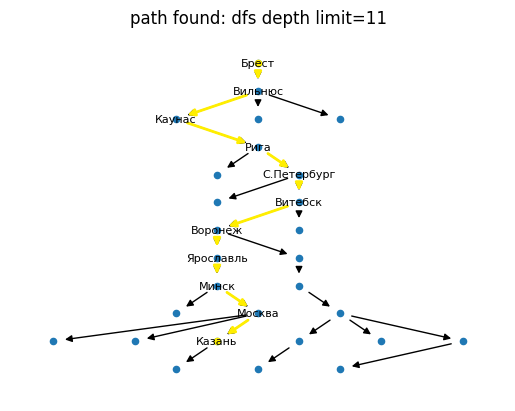

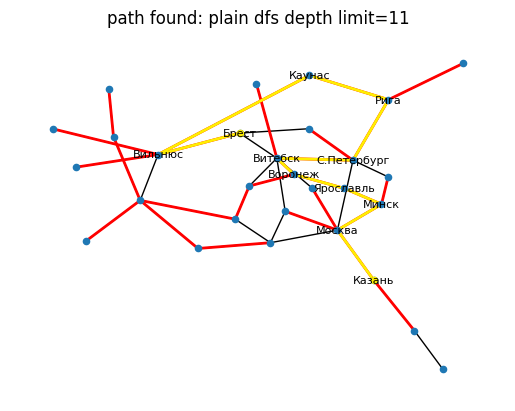

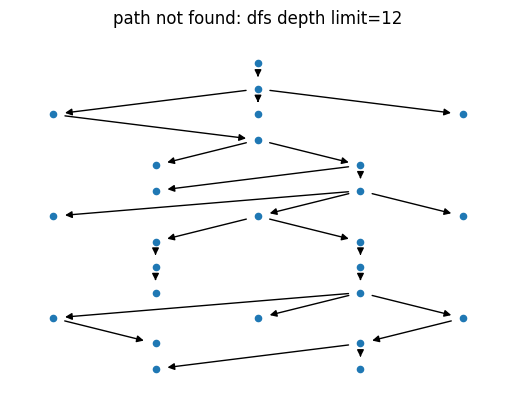

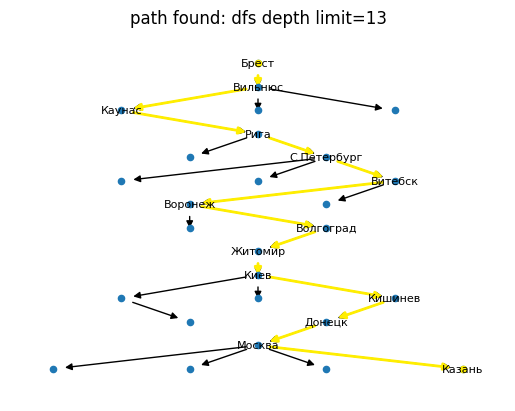

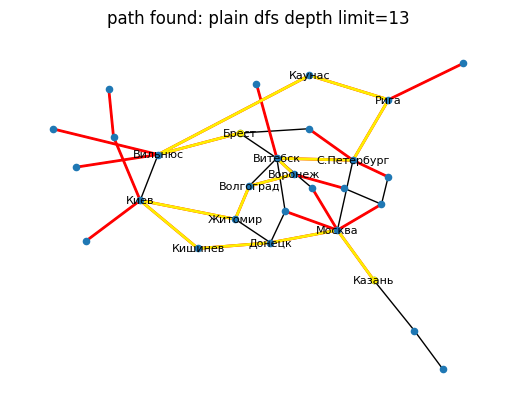

In [8]:
from generate_tree_position import generate_tree_position as gtp
from find_path_and_draw import find_path_and_draw as fpd
from draw_graph import draw_graph as dg
for L in range(1, 14):
    dfs_tree_ = nx.dfs_tree(G, source=SOURCE_NODE, depth_limit=L)
    tree_pos = gtp(dfs_tree_)
    if dfs_tree_.nodes.__contains__(DESTINATION_NODE):
        fpd(dfs_tree_, list(dfs_tree_.edges), tree_pos, title_string="path found: dfs depth limit="+str(L),
            mark_red=False)
        fpd(G, list(dfs_tree_.edges), main_pos, title_string="path found: plain dfs depth limit="+str(L))
        # compute complexity as b^d where b - branching factor; d - minimum result depth
        b = mbf(dfs_tree_)
        d = L
        print("complexity:")
        print(b**d)
    else:
        dg(dfs_tree_, tree_pos, title_string="path not found: dfs depth limit="+str(L))


intersection:
set()
intersection:
{'Ниж.Новгород', 'С.Петербург', 'Орел'}
meow2
path:
[('Брест', 'Витебск'), ('Витебск', 'Ниж.Новгород')]
path:
[('Казань', 'Москва'), ('Москва', 'Ниж.Новгород')]
path:
[('Брест', 'Витебск'), ('Витебск', 'С.Петербург')]
path:
[('Казань', 'Москва'), ('Москва', 'С.Петербург')]
path:
[('Брест', 'Витебск'), ('Витебск', 'Орел')]
path:
[('Казань', 'Москва'), ('Москва', 'Орел')]
intersection:
{'Ниж.Новгород', 'С.Петербург', 'Орел'}


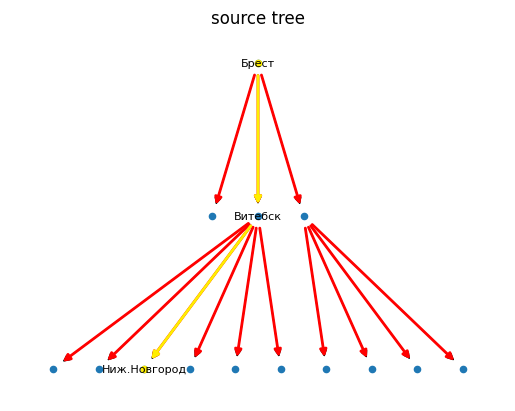

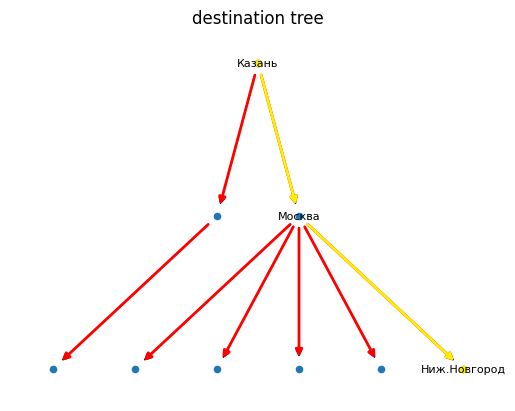

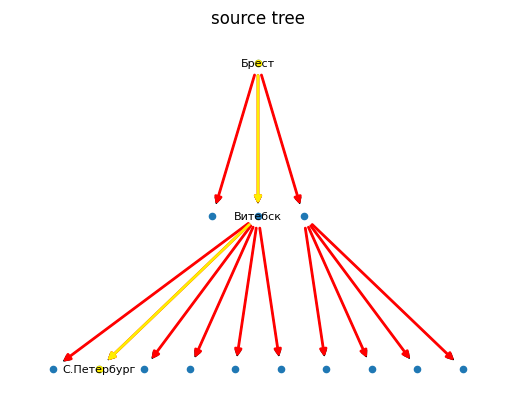

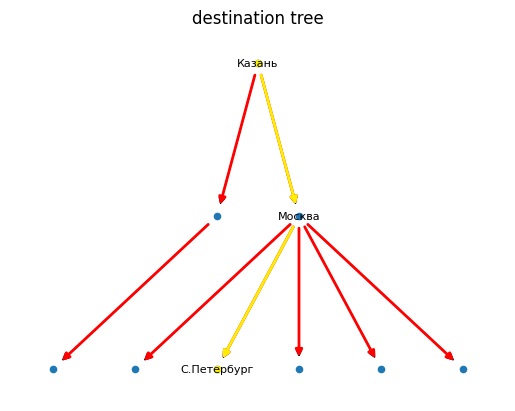

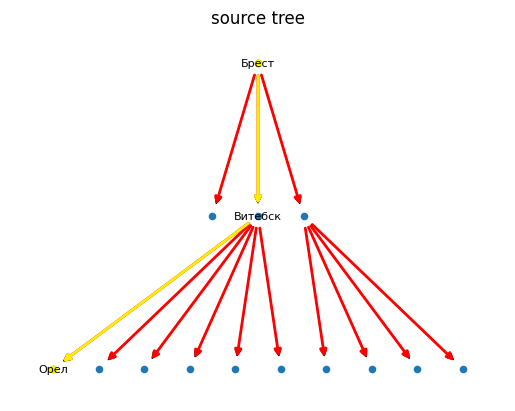

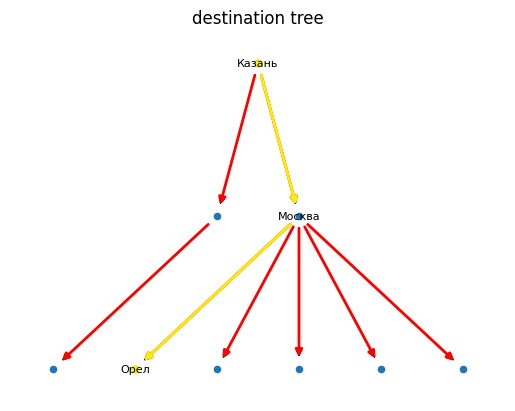

In [9]:
L = 1
intersection_nodes = None
while True:
    source_tree = nx.bfs_tree(G, source=SOURCE_NODE, depth_limit=L)
    destination_tree = nx.bfs_tree(G, source=DESTINATION_NODE, depth_limit=L)
    intersection_nodes = set(source_tree.nodes).intersection(set(destination_tree.nodes))
    print("intersection:")
    print(intersection_nodes)
    if intersection_nodes != set():
        print("meow"+str(L))
        break
    L += 1
source_tree_pos = gtp(source_tree)
destination_tree_pos = gtp(destination_tree)
for intersection_node in intersection_nodes:
    fpd(source_tree, source_tree.edges, source_tree_pos, title_string="source tree", source_node=SOURCE_NODE,
        destination_node=intersection_node)
    fpd(destination_tree, destination_tree.edges, destination_tree_pos, title_string="destination tree",
        source_node=DESTINATION_NODE,
        destination_node=intersection_node)
print("intersection:")
print(intersection_nodes)

# compute complexity as b^(d/2) b - branching factor; d - minimum result depth